<a href="https://colab.research.google.com/github/ViniciusVSC/AtividadePraticaemGrupoRA3/blob/main/Atividade_Pr%C3%A1tica_em_Grupo_RA3_3_2023_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOCK

Valor exato da integral de f(x) = x^2 no intervalo [0, 1]: 1/3
Estimativa da integral de f(x) = x^2 no intervalo [0, 1] usando a Simulação de Monte Carlo: 0.3257
Tempo necessário para calcular a área: 4.074885845184326 segundos


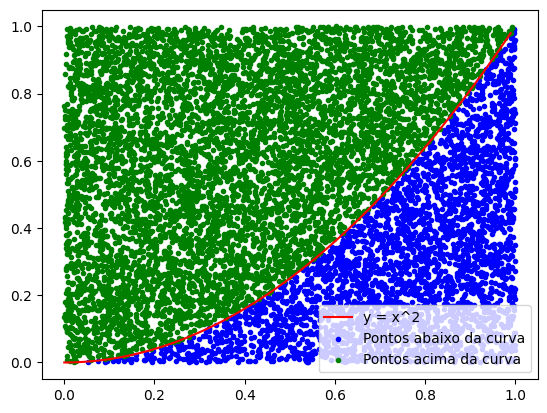

In [6]:
import matplotlib.pyplot as plt
import random
from sympy import symbols, integrate
import threading
import time

# Definir a variável para cálculo simbólico
x = symbols('x')

# Definir a função
f = x**2

# Calcular a integral exata da função no intervalo [0, 1]
exact_integral = integrate(f, (x, 0, 1))
print("Valor exato da integral de f(x) = x^2 no intervalo [0, 1]:", exact_integral)

# Número de pontos aleatórios a serem gerados
N = 10000

# Listas para armazenar os pontos que caem abaixo e acima da curva da função
below_curve_x = []
below_curve_y = []
above_curve_x = []
above_curve_y = []

# Lock para sincronização
lock = threading.Lock()

count = 0
def calcular_ponto():
    global count
    
    # Gerar um ponto aleatório no intervalo [0, 1]
    x = random.random()
    
    # Gerar um valor y aleatório entre 0 e o máximo valor que f(x) pode ter no intervalo [0, 1]
    y = random.random()

    # Se o valor y cai abaixo da curva da função no ponto x, incrementar o contador
    if y < x**2:
        with lock:
            count += 1
            below_curve_x.append(x)
            below_curve_y.append(y)
    else:
        with lock:
            above_curve_x.append(x)
            above_curve_y.append(y)

# Cria as threads
threads = [threading.Thread(target=calcular_ponto) for _ in range(N)]

# Inicia o cronômetro
start_time = time.time()

# Inicia as threads
for t in threads:
    t.start()

# Espera todas as threads terminarem
for t in threads:
    t.join()

# Finaliza o cronômetro e calcula o tempo decorrido
end_time = time.time()
elapsed_time = end_time - start_time

# A estimativa da integral é a proporção de pontos que caíram abaixo da curva da função
integral_estimate = count / N

print("Estimativa da integral de f(x) = x^2 no intervalo [0, 1] usando a Simulação de Monte Carlo:", integral_estimate)
print("Tempo necessário para calcular a área:", elapsed_time, "segundos")

# Gerar o gráfico
fig, ax = plt.subplots()

# Traçar a curva da função
x = [i/100 for i in range(100)]
y = [i**2 for i in x]
ax.plot(x, y, 'r', label='y = x^2')

# Adicionar os pontos que caíram abaixo e acima da curva da função
ax.scatter(below_curve_x, below_curve_y, color='blue', marker='.', label='Pontos abaixo da curva')
ax.scatter(above_curve_x, above_curve_y, color='green', marker='.', label='Pontos acima da curva')

# Adicionar uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()


Semaphores

Valor exato da integral de f(x) = x^2 no intervalo [0, 1]: 1/3
Estimativa da integral de f(x) = x^2 no intervalo [0, 1] usando a Simulação de Monte Carlo: 0.3289
Tempo necessário para calcular a área: 2.1245882511138916 segundos


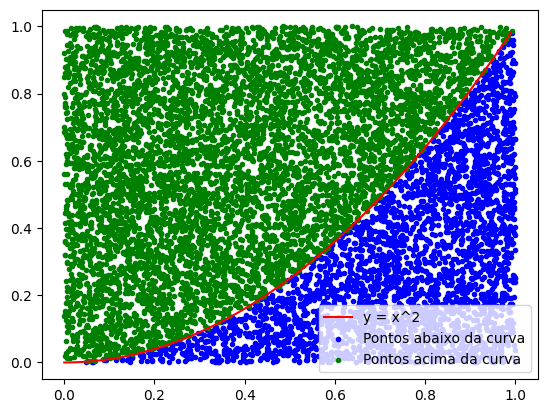

In [7]:
import matplotlib.pyplot as plt
import random
from sympy import symbols, integrate
import threading
import time

# Definir a variável para cálculo simbólico
x = symbols('x')

# Definir a função
f = x**2

# Calcular a integral exata da função no intervalo [0, 1]
exact_integral = integrate(f, (x, 0, 1))
print("Valor exato da integral de f(x) = x^2 no intervalo [0, 1]:", exact_integral)

# Número de pontos aleatórios a serem gerados
N = 10000

# Listas para armazenar os pontos que caem abaixo e acima da curva da função
below_curve_x = []
below_curve_y = []
above_curve_x = []
above_curve_y = []

# Semáforo para sincronização
semaphore = threading.Semaphore(1)

count = 0

# Função para calcular a área
def calcular_area():
    global count
    
    # Iniciar o cronômetro
    start_time = time.time()
    
    # Cria as threads
    threads = [threading.Thread(target=calcular_ponto) for _ in range(N)]

    # Inicia as threads
    for t in threads:
        t.start()

    # Espera todas as threads terminarem
    for t in threads:
        t.join()

    # Finalizar o cronômetro
    end_time = time.time()

    # A estimativa da integral é a proporção de pontos que caíram abaixo da curva da função
    integral_estimate = count / N

    print("Estimativa da integral de f(x) = x^2 no intervalo [0, 1] usando a Simulação de Monte Carlo:", integral_estimate)
    
    # Calcular o tempo total
    elapsed_time = end_time - start_time
    print("Tempo necessário para calcular a área:", elapsed_time, "segundos")

# Função para calcular um ponto
def calcular_ponto():
    global count
    
    # Gerar um ponto aleatório no intervalo [0, 1]
    x = random.random()
    
    # Gerar um valor y aleatório entre 0 e o máximo valor que f(x) pode ter no intervalo [0, 1]
    y = random.random()

    # Se o valor y cai abaixo da curva da função no ponto x, incrementar o contador
    if y < x**2:
        semaphore.acquire()
        count += 1
        below_curve_x.append(x)
        below_curve_y.append(y)
        semaphore.release()
    else:
        semaphore.acquire()
        above_curve_x.append(x)
        above_curve_y.append(y)
        semaphore.release()

# Chamar a função para calcular a área
calcular_area()

# Gerar o gráfico
fig, ax = plt.subplots()

# Traçar a curva da função
x = [i/100 for i in range(100)]
y = [i**2 for i in x]
ax.plot(x, y, 'r', label='y = x^2')

# Adicionar os pontos que caíram abaixo e acima da curva da função
ax.scatter(below_curve_x, below_curve_y, color='blue', marker='.', label='Pontos abaixo da curva')
ax.scatter(above_curve_x, above_curve_y, color='green', marker='.', label='Pontos acima da curva')

# Adicionar uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()


Conditions

Valor exato da integral de f(x) = x^2 no intervalo [0, 1]: 1/3
Estimativa da integral de f(x) = x^2 no intervalo [0, 1] usando a Simulação de Monte Carlo: 0.3322
Tempo necessário para calcular a área: 0.8213241100311279 segundos


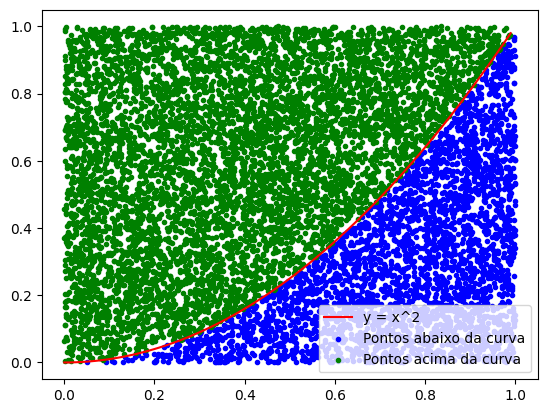

In [8]:
import matplotlib.pyplot as plt
import random
from sympy import symbols, integrate
import threading
import time

# Definir a variável para cálculo simbólico
x = symbols('x')

# Definir a função
f = x**2

# Calcular a integral exata da função no intervalo [0, 1]
exact_integral = integrate(f, (x, 0, 1))
print("Valor exato da integral de f(x) = x^2 no intervalo [0, 1]:", exact_integral)

# Número de pontos aleatórios a serem gerados
N = 10000

# Listas para armazenar os pontos que caem abaixo e acima da curva da função
below_curve_x = []
below_curve_y = []
above_curve_x = []
above_curve_y = []

# Variáveis de condição para sincronização
condition_below = threading.Condition()
condition_above = threading.Condition()

count = 0
def calcular_ponto():
    global count
    
    # Gerar um ponto aleatório no intervalo [0, 1]
    x = random.random()
    
    # Gerar um valor y aleatório entre 0 e o máximo valor que f(x) pode ter no intervalo [0, 1]
    y = random.random()

    # Se o valor y cai abaixo da curva da função no ponto x, incrementar o contador
    if y < x**2:
        with condition_below:
            count += 1
            below_curve_x.append(x)
            below_curve_y.append(y)
            condition_below.notify()
    else:
        with condition_above:
            above_curve_x.append(x)
            above_curve_y.append(y)
            condition_above.notify()

# Cria as threads
threads = [threading.Thread(target=calcular_ponto) for _ in range(N)]

# Inicia o contador de tempo
start_time = time.time()

# Inicia as threads
for t in threads:
    t.start()

# Espera todas as threads terminarem
for t in threads:
    t.join()

# Calcula o tempo decorrido
elapsed_time = time.time() - start_time

# A estimativa da integral é a proporção de pontos que caíram abaixo da curva da função
integral_estimate = count / N

print("Estimativa da integral de f(x) = x^2 no intervalo [0, 1] usando a Simulação de Monte Carlo:", integral_estimate)
print("Tempo necessário para calcular a área:", elapsed_time, "segundos")

# Gerar o gráfico
fig, ax = plt.subplots()

# Traçar a curva da função
x = [i/100 for i in range(100)]
y = [i**2 for i in x]
ax.plot(x, y, 'r', label='y = x^2')

# Adicionar os pontos que caíram abaixo e acima da curva da função
ax.scatter(below_curve_x, below_curve_y, color='blue', marker='.', label='Pontos abaixo da curva')
ax.scatter(above_curve_x, above_curve_y, color='green', marker='.', label='Pontos acima da curva')

# Adicionar uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()


Barriers

Valor exato da integral de f(x) = x^2 no intervalo [0, 1]: 1/3
Estimativa da integral de f(x) = x^2 no intervalo [0, 1] usando a Simulação de Monte Carlo: 0.3314
Tempo necessário para calcular a área: 11.610016345977783 segundos


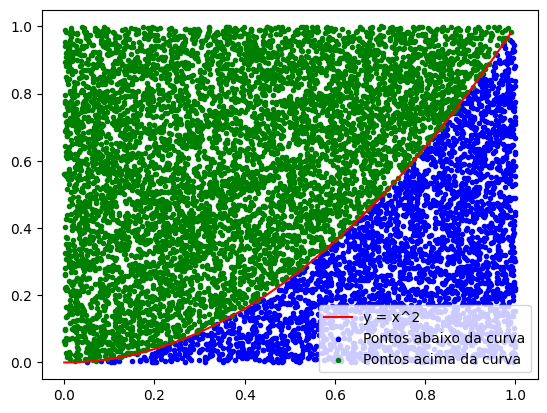

In [10]:
import matplotlib.pyplot as plt
import random
from sympy import symbols, integrate
import threading
import time

# Definir a variável para cálculo simbólico
x = symbols('x')

# Definir a função
f = x**2

# Calcular a integral exata da função no intervalo [0, 1]
exact_integral = integrate(f, (x, 0, 1))
print("Valor exato da integral de f(x) = x^2 no intervalo [0, 1]:", exact_integral)

# Número de pontos aleatórios a serem gerados
N = 10000

# Listas para armazenar os pontos que caem abaixo e acima da curva da função
below_curve_x = []
below_curve_y = []
above_curve_x = []
above_curve_y = []

# Barreira para sincronização
barrier = threading.Barrier(N + 1)  # N+1 para incluir a thread principal

count = 0
def calcular_ponto():
    global count
    
    # Gerar um ponto aleatório no intervalo [0, 1]
    x = random.random()
    
    # Gerar um valor y aleatório entre 0 e o máximo valor que f(x) pode ter no intervalo [0, 1]
    y = random.random()

    # Se o valor y cai abaixo da curva da função no ponto x, incrementar o contador
    if y < x**2:
        count += 1
        below_curve_x.append(x)
        below_curve_y.append(y)
    else:
        above_curve_x.append(x)
        above_curve_y.append(y)

    # Sinalizar que a thread concluiu seu trabalho
    barrier.wait()

# Cria as threads
threads = [threading.Thread(target=calcular_ponto) for _ in range(N)]

# Inicia o contador de tempo
start_time = time.time()

# Inicia as threads
for t in threads:
    t.start()

# Sinaliza que a thread principal também chegou na barreira
barrier.wait()

# Espera todas as threads terminarem
for t in threads:
    t.join()

# Calcula o tempo necessário
elapsed_time = time.time() - start_time

# A estimativa da integral é a proporção de pontos que caíram abaixo da curva da função
integral_estimate = count / N

print("Estimativa da integral de f(x) = x^2 no intervalo [0, 1] usando a Simulação de Monte Carlo:", integral_estimate)
print("Tempo necessário para calcular a área:", elapsed_time, "segundos")

# Gerar o gráfico
fig, ax = plt.subplots()

# Traçar a curva da função
x = [i/100 for i in range(100)]
y = [i**2 for i in x]
ax.plot(x, y, 'r', label='y = x^2')

# Adicionar os pontos que caíram abaixo e acima da curva da função
ax.scatter(below_curve_x, below_curve_y, color='blue', marker='.', label='Pontos abaixo da curva')
ax.scatter(above_curve_x, above_curve_y, color='green', marker='.', label='Pontos acima da curva')

# Adicionar uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()
